# Country demonstration for evaluating boundata dataset uncertainty

## Imports

In [1]:
# imports
import boundarytools
import numpy as np

import json
from urllib.request import urlopen

## Load in a set of country boundaries a particular source

In [2]:
# set params
country = 'BDI' #'TUN' #'BDI' #'BLR' #'LUX' #'CHE'
source = 'naturalEarth' # naturalEarth OR gadm
level = 1

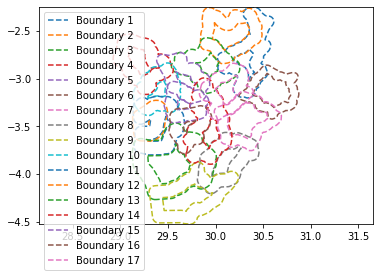

In [3]:
# load data
topoj = json.loads(urlopen('https://media.githubusercontent.com/media/wmgeolab/geoContrast/main/releaseData/{source}/{country}/ADM{level}/{source}-{country}-ADM{level}.topojson'.format(country=country, source=source, level=level)).read())
coll = boundarytools.utils.topo2geoj(topoj)
boundaries = [boundarytools.uncertainty.NormalBoundary(f['geometry']) for f in coll['features']]
boundarytools.utils.show_boundaries(boundaries)

## First let's see how reliably we can be certain to be inside one or another boundary

In [4]:
# set params
res = 0.01

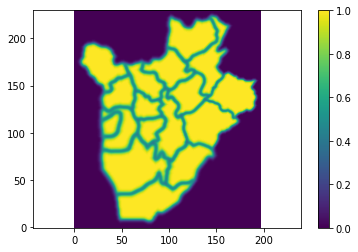

certainty that we are within a particular boundary unit for BDI-1, from naturalEarth


In [5]:
# calc inside certainty surface
certainty = boundarytools.uncertainty.probability_inside(boundaries, resolution=res)
boundarytools.utils.show_surface(certainty)
print('certainty that we are within a particular boundary unit for {}-{}, from {}'.format(country,level,source))

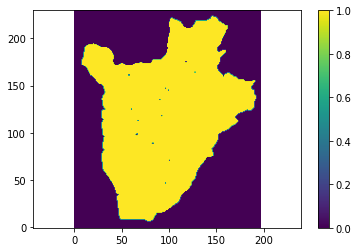

hypothetical perfect certainty scenario


In [6]:
# hypothetical perfect certainty scenario
# ie if there were full certainty/probability of being inside all pixels (above 0 certainty?)
perfectcert = boundarytools.uncertainty.crisp_footprints(boundaries, resolution=res)
boundarytools.utils.show_surface(perfectcert)
print('hypothetical perfect certainty scenario')

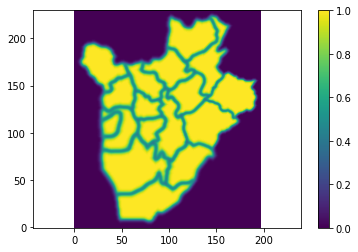

sum total of all pixel certainties/probabilities:
90.74%


In [7]:
# weighted sum
# ie sum the weighted certainty for each no-nan pixel
nonan = np.where(~np.isnan(certainty), certainty, 0)
boundarytools.utils.show_surface(nonan)
perc = nonan.sum() / perfectcert.sum() * 100
print('sum total of all pixel certainties/probabilities:')
print('{:.2f}%'.format(perc))

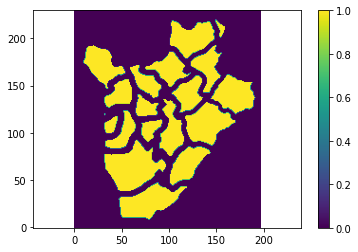

share of pixels that we can be highly certain (>0.9 probability) is within a particular boundary unit:
66.58%


In [8]:
# high certainty
# ie share of pixels above 0.9 certainty (not weighted, each pixel is 0/1 above or below threshold)
highcert = np.where(certainty >= 0.9, 1, 0)
boundarytools.utils.show_surface(highcert)
perc = highcert.sum() / perfectcert.sum() * 100
print('share of pixels that we can be highly certain (>0.9 probability) is within a particular boundary unit:')
print('{:.2f}%'.format(perc))

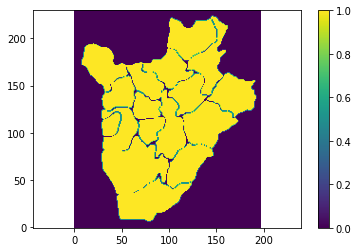

share of pixels that there is better than 50-50 probability is within a particular boundary unit:
96.09%


In [9]:
# med certainty
# ie share of pixels above 0.5 certainty (not weighted, each pixel is 0/1 above or below threshold)
highcert = np.where(certainty >= 0.5, 1, 0)
boundarytools.utils.show_surface(highcert)
perc = highcert.sum() / perfectcert.sum() * 100
print('share of pixels that there is better than 50-50 probability is within a particular boundary unit:')
print('{:.2f}%'.format(perc))